In [2]:
import numpy as np
from shapely import Polygon

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [20]:
import skimage.data as data
import skimage.segmentation as seg
from skimage import filters
from skimage import draw
from skimage import color
from skimage import exposure
from skimage.segmentation import mark_boundaries


In [29]:
import imageio

In [33]:
fp01_2 = imageio.v3.imread('plans/fp01.png', pilmode='RGB')

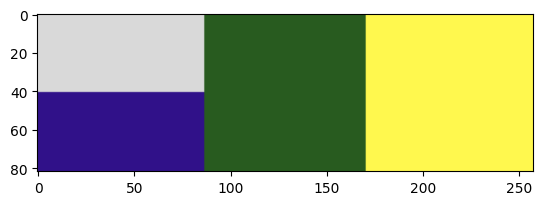

In [34]:
plt.imshow(fp01_2)

In [4]:
def image_show(image, nrows=1, ncols=1, cmap='gray', **kwargs):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 16))
    ax.imshow(image)
    # ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

In [23]:
fp01 = np.asarray(Image.open('plans/fp01.png'))
# print(repr(img))

In [ ]:
fp01_2 = np.asarray(Image.open('plans/fp01.png'))

In [26]:
fp01

array([[[217, 217, 217, 255],
        [217, 217, 217, 255],
        [217, 217, 217, 255],
        ...,
        [255, 248,  78, 255],
        [255, 248,  78, 255],
        [255, 248,  78, 255]],

       [[217, 217, 217, 255],
        [217, 217, 217, 255],
        [217, 217, 217, 255],
        ...,
        [255, 248,  78, 255],
        [255, 248,  78, 255],
        [255, 248,  78, 255]],

       [[217, 217, 217, 255],
        [217, 217, 217, 255],
        [217, 217, 217, 255],
        ...,
        [255, 248,  78, 255],
        [255, 248,  78, 255],
        [255, 248,  78, 255]],

       ...,

       [[ 48,  17, 137, 255],
        [ 48,  17, 137, 255],
        [ 48,  17, 137, 255],
        ...,
        [255, 248,  78, 255],
        [255, 248,  78, 255],
        [255, 248,  78, 255]],

       [[ 48,  17, 137, 255],
        [ 48,  17, 137, 255],
        [ 48,  17, 137, 255],
        ...,
        [255, 248,  78, 255],
        [255, 248,  78, 255],
        [255, 248,  78, 255]],

       [[ 48

In [24]:
fp01.shape

(82, 258, 4)

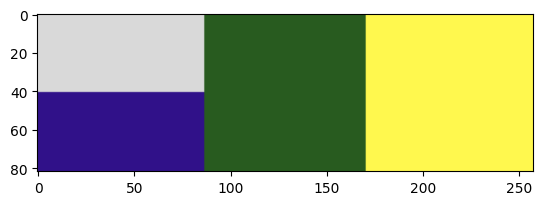

In [6]:
imgplot = plt.imshow(fp01)

(<Figure size 1600x1600 with 1 Axes>, <AxesSubplot:>)

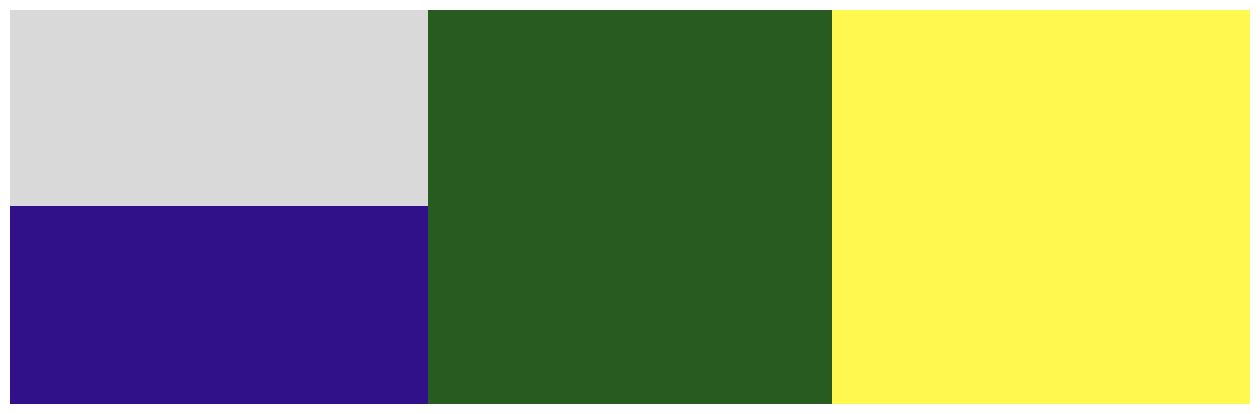

In [7]:
image_show(fp01)

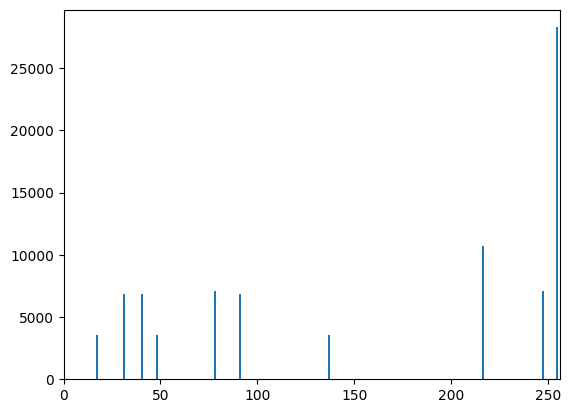

In [8]:
fig, ax = plt.subplots(1, 1)
ax.hist(fp01.ravel(), bins=256, range=[0, 255])
ax.set_xlim(0, 256);
# very discrete locations which is good -> potentially very clear 

In [35]:
# try unsupervised segmentation 
fp01_slic = seg.slic(fp01_2)
fp01_slic


array([[ 1,  1,  1, ..., 15, 15, 15],
       [ 1,  1,  1, ..., 15, 15, 15],
       [ 1,  1,  1, ..., 15, 15, 15],
       ...,
       [56, 56, 56, ..., 70, 70, 70],
       [56, 56, 56, ..., 70, 70, 70],
       [56, 56, 56, ..., 70, 70, 70]])

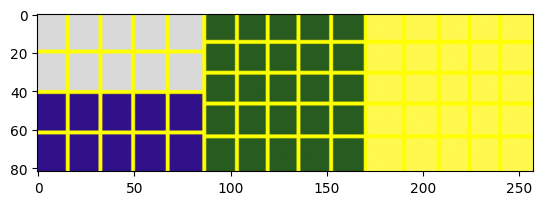

In [36]:
# ax[0, 0].imshow(mark_boundaries(img, segments_fz))
plt.imshow(mark_boundaries(fp01_2, fp01_slic))

In [15]:
astronaut = data.astronaut()
# image_show(astronaut);

In [25]:
astronaut.shape

(512, 512, 3)

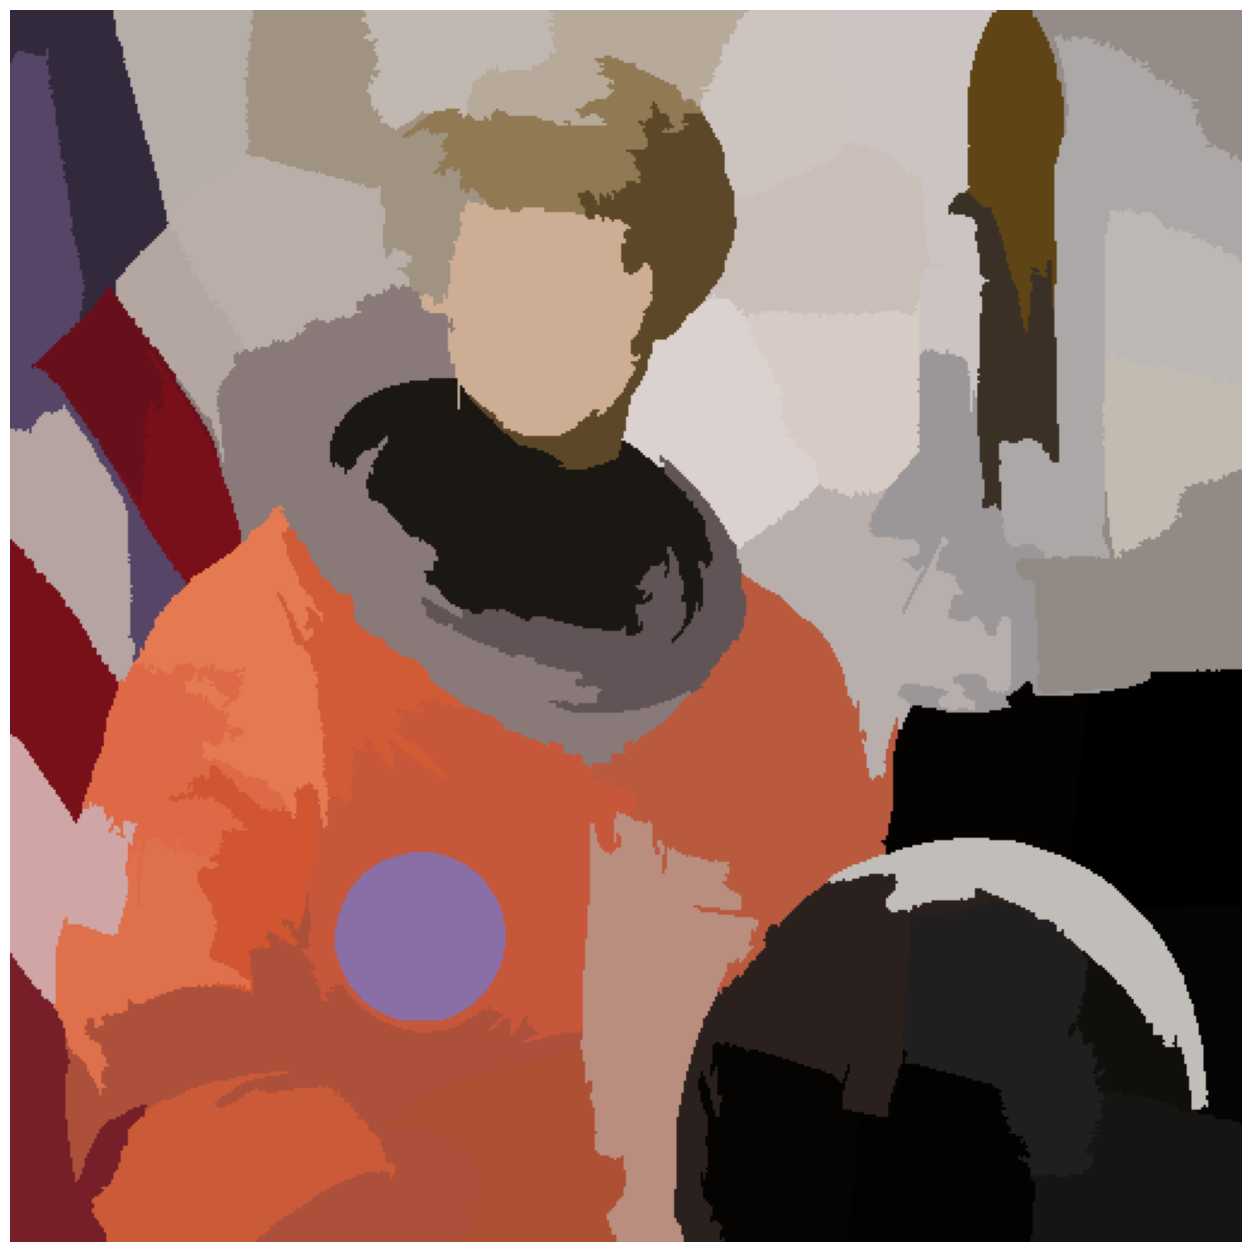

In [17]:
astronaut_slic = seg.slic(astronaut)
image_show(color.label2rgb(astronaut_slic, astronaut, kind='avg'));

In [13]:
image_show(color.label2rgb(fp01_slic, fp01, kind='avg'));

ValueError: shape mismatch: value array of shape (4,) could not be broadcast to indexing result of shape (225,3)

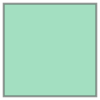

In [9]:
room_dim = 10
room = Polygon([[0, 0], [room_dim, 0], [room_dim, room_dim], [0, room_dim], [0, 0]])
room

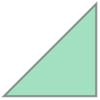

In [10]:
polygon = Polygon([(0, 0), (1, 1), (1, 0)])
polygon